# 1. The Qubit

In this lesson you will learn:
- Representation of qubits
- Transforming a qubit with quantum logic gates
- Valid qubit states
- Visualizing a qubit
- Measurement
- BONUS: Qudits (higher-order quantum states like qutrits)

In [1]:
# Specific install for Kaggle Notebooks environment
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# Kaleido is used to convert Plotly to static png
!pip install -Uqq kaleido

In [2]:
import numpy as np
import plotly.graph_objects as go

# Fix Plotly rendering in Jupyter forks.
# If you are running this notebook locally you can comment this out.
# This allows you to play with interactive Plotly plots.
import plotly.io as pio
pio.renderers.default = 'png'

## What is a qubit?

The fundamental unit of classical computing is the bit, which can be $0$ or $1$. These bits can be represented in a variety of ways. We can for example turn an electric switch **on** ($1$) or **off** ($0$). We can take a coin and say **heads** is $1$ and **tails** is $0$. We can even keep track of $0$ and $1$ on a piece of paper. 

A qubit also has binary characteristics, but the qubit can have any complex state between $0$ and $1$. This often leads to misleading statements like "a qubit can be $0$ and $1$ at the same time" or "a qubit can hold an infinite amount of information". This has some philosophical validity for the quantum state, but we cannot use qubits in the same way as classical bits. This is because in order to obtain information from the quantum state, it first has to be measured. This measuring process leads to collapse of the qubit to a (classical) bit ($0$ or $1$). Quantum states can also not be copied due to the [no-cloning theorem](https://en.wikipedia.org/wiki/No-cloning_theorem). Therefore, "easy computing problems" like arithmetic and graphics are better suited to run on classical computers. Working with qubits only has advantages for a certain range of problems.

Like classical bits, there are various ways to represent a qubit. Examples include:

1. Laser pulses
2. Electrons
3. Superconductors

Each method has its own operational implications, but the mathematical representation of qubits stays exactly the same. Compare it to classical computer science, where the same algorithms hold for all computer architectures. Computer scientists don't have to develop sorting algorithms from scratch every time a new chip is released.

We will focus on the fundamental representation of the qubit as a vector of complex numbers. For an intuitive explanation of a qubit in video format, [check out this video](https://www.youtube.com/watch?v=kgSVkVNxXyU).


Quantum computing is all about a state evolving (over time) through a series of operations called quantum logic gates. Many algorithms we will discuss start from a "zero state". This is comparable to a $0$ in classical computing. For one qubit, the zero state is represented as:

$$\begin{bmatrix}
1 + 0i \\
0 + 0i
\end{bmatrix} = \begin{bmatrix}
1 \\
0
\end{bmatrix} = 1|0\rangle + 0|1\rangle = |0\rangle
$$

The numbers in this vector are complex numbers. If the complex part of the numbers is $0$, like for $|0\rangle$, we omit writing the complex part. The $|0\rangle$ representation is used as short-hand and is called [Bra-ket notation](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation). A symbol like $|0\rangle$ is called a **Ket**.

In [3]:
zero_state = np.array([[1, 0]], dtype=complex).T
# Zero state "Ket"
zero_state

array([[1.+0.j],
       [0.+0.j]])

A Ket can be converted into a **Bra** state by transposing the vector and flipping the sign of the complex part. This operation is called a [Hermitian conjugate](https://en.wikipedia.org/wiki/Complex_conjugate) or  dagger ($\dagger$) operation. Using the notations of **Bra** and **Ket** will come in handy when we discuss measurement of quantum states.

$$
\begin{bmatrix}
1 + 0i \\
0 + 0i
\end{bmatrix}^\dagger = \begin{bmatrix}
1-0i & 0-0i
\end{bmatrix} = \begin{bmatrix}
1 & 0
\end{bmatrix} = 1 \langle 0| + 0 \langle 1| = \langle 0|
$$

In [NumPy](https://numpy.org), the Hermitian conjugate is obtained with [`.T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) followed by [`.conj()`](https://numpy.org/doc/2.1/reference/generated/numpy.conj.html).

In [4]:
# Zero state "Bra"
zero_state.T.conj()

array([[1.-0.j, 0.-0.j]])

The opposite of the zero state is the one state:

$$
\begin{bmatrix}
0 \\
1
\end{bmatrix} = 0|0\rangle + 1|1\rangle = |1\rangle
$$


In [5]:
one_state = np.array([[0, 1]], dtype=complex).T
one_state

array([[0.+0.j],
       [1.+0.j]])

So how do we get from a $|0\rangle$ to $|1\rangle$ in quantum computing? This is achieved through quantum logic **gates**. One of the simplest meaningful quantum logic gates is the **X (NOT)** gate. A quantum logic gate for a single qubit is a $2 \times 2$ complex matrix. The $X$ gate flips the state of the qubit around the X-axis.

$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$



In [6]:
X = np.array([[0, 1], 
              [1, 0]], dtype=complex)
X @ zero_state

array([[0.+0.j],
       [1.+0.j]])

$$
X |0\rangle = |1\rangle
$$


This vector-matrix multiplication of a gate and a state, although simple, is a quantum computation! We're doing it! Applying the $X$ gate again on our obtained $|1\rangle$ state will return the $|0\rangle$ state:

$$
X(X |0\rangle) = X |1\rangle = |0\rangle
$$


In [7]:
X @ X @ zero_state

array([[1.+0.j],
       [0.+0.j]])

There are many different quantum logic gates and you can make your own as long as they pass some requirements. We will go in-depth on logic gates in the next notebook.

## Requirements of a qubit

Thus far our quantum computations have not been more powerful than classical bit flips. That changes now with the introduction of superposition. 

The main requirement for a valid qubit state is that the absolute values of the numbers in the vector squared add up to 1. In other words, for a vector $\begin{bmatrix} a \\ b \end{bmatrix}$ to be a valid qubit state, it must be true that $|a|^2 + |b|^2 = 1$. This is because the statevector describes a probability distribution. Therefore, we can create a state where that is halfway between the $|0\rangle$ and $|1\rangle$ state. This notion of a state being $|0\rangle$, $|1\rangle$ or somewhere in between is called superposition. Superposition is one of the main characteristics that distinguishes quantum computing from classical computing.

An arbitrary quantum state is a superposition of the $|0\rangle$ state and $|1\rangle$ state, which we often denote with the symbol $|\psi\rangle$:

$$
|\psi\rangle = a |0\rangle + b |1\rangle
$$

One of the most common states besides $|0\rangle$ and $|1\rangle$ is the superposition state $|+\rangle$:

$$ |+\rangle = 
\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} 0.707 \\ 0.707 \end{bmatrix}  = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
$$

If we measure this state, there is an equal probability of getting a $0$ or $1$. Perfect randomness like this cannot be achieved in classical computing and definitely not with a single bit. Classical computers can only achieve [pseudo-randomness](https://en.wikipedia.org/wiki/Pseudorandomness), while a qubit can achieve true randomness.


In [8]:
plus_state = np.array([1 / np.sqrt(2), 
                                1 / np.sqrt(2)], dtype=complex)
plus_state

array([0.70710678+0.j, 0.70710678+0.j])

We verify that this is a valid state by checking that $|\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2 = 1$.

In [9]:
plus_abs_sq_sum = np.sum(np.abs(plus_state) ** 2)
plus_abs_sq_sum

0.9999999999999998

In [10]:
np.allclose(plus_abs_sq_sum, 1)

True

What happens if we apply our X gate on this superposition state.

In [11]:
X @ plus_state

array([0.70710678+0.j, 0.70710678+0.j])

In [12]:
np.allclose(X @ plus_state, plus_state)

True

Interesting, nothing changed! This is because we are trying to flip around an axis that is perpendicular to the superposition state on the X-axis. Recall that the statevector of a qubit contains two complex numbers. The state of a qubit therefore envelops a 3-dimensional (3D) space. All quantum logic gates can be represented as rotations in this space. 


Let's look at a qubit visually with [plotly](https://plotly.com) to fully grasp the significance of this. A visual representation of a qubit is called a [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere). I've prepared a function plot a qubit on a 3D Bloch sphere. For now you don't have to worry about the details of the code.

In [13]:
def bloch(state: np.array):
    """Plot single qubit state on a Bloch sphere."""

    def calculate_coordinates(theta, phi):
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        return x, y, z

    fig = go.Figure()
    alpha, beta = state[0], state[1]
    theta = 2 * np.arccos(np.abs(alpha))
    phi = np.angle(beta) - np.angle(alpha)
    x, y, z = calculate_coordinates(theta, phi)
    surface_phi, surface_theta = np.mgrid[0 : 2 * np.pi : 100j, 0 : np.pi : 50j]
    xs, ys, zs = calculate_coordinates(surface_theta, surface_phi)

    fig.add_trace(go.Surface(x=xs, y=ys, z=zs, opacity=0.5, colorscale="Blues", showscale=False))

    fig.add_trace(go.Scatter3d(x=[0, x], y=[0, y], z=[0, z], mode="lines+markers+text", marker=dict(size=10, color="green"), line=dict(color="green", width=8), textposition="top center", showlegend=True, name=f"{alpha:.3f}|0⟩ + {beta:.3f}|1⟩"))

    fig.add_trace(go.Scatter3d(x=[0, 0, 1, -1, 0, 0], y=[0, 0, 0, 0, 1, -1], z=[1, -1, 0, 0, 0, 0], mode="markers", marker=dict(size=5, color="black"), hovertext=["|0⟩", "|1⟩", "|+⟩", "|-⟩", "|i⟩", "|-i⟩"], showlegend=False, name="Basis states"))

    boundary_phi = np.linspace(0, 2 * np.pi, 100)
    coords = [(np.cos(boundary_phi), np.sin(boundary_phi), np.zeros_like(boundary_phi)), (np.zeros_like(boundary_phi), np.cos(boundary_phi), np.sin(boundary_phi)), (np.cos(boundary_phi), np.zeros_like(boundary_phi), np.sin(boundary_phi))]

    for x, y, z in coords:
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode="lines", line=dict(color="black", width=2), showlegend=False, name="Axes"))

    fig.update_layout(
        legend=dict(
            font=dict(size=20),
            x=0.05,
            y=0.95,
            xanchor="left",
            yanchor="top",
            bgcolor="rgba(0,0,0,0)",
        ),
        margin=dict(l=0, r=0, t=0, b=0),
    )
    return fig

For the zero state $|0\rangle$, the Bloch sphere represents the qubit at the north pole. A valid qubit state can be anywhere on the surface of this (unit) sphere. 


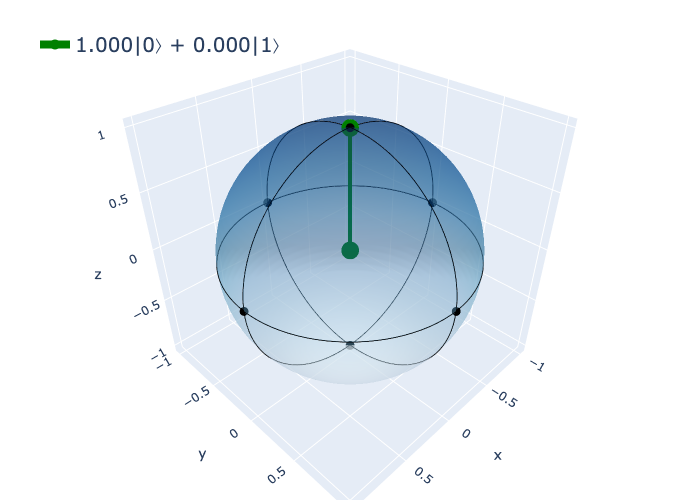

In [14]:
bloch([1, 0])

For the one state $|1\rangle$, the Bloch sphere represents the qubit at the south pole. 

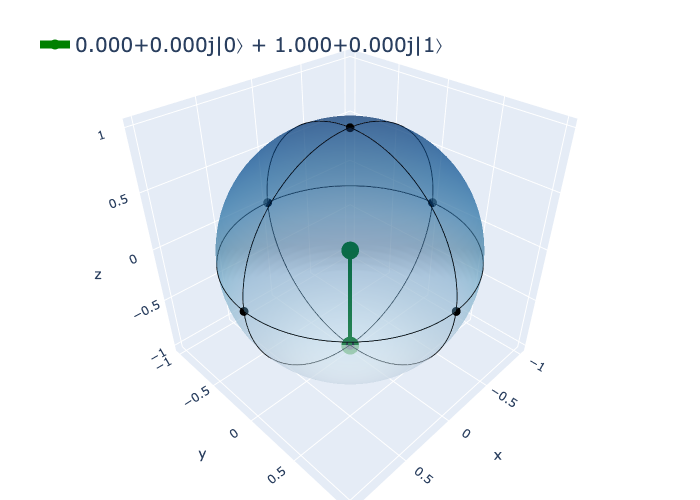

In [15]:
bloch(np.array([0, 1], dtype=complex))

In the superposition state $|+\rangle$, the qubit is exactly between the north and south pole. We can now see why the state doesn't change when an $X$ gate is applied. If we rotate the sphere on the X-axis, the line will stay pointed in the same direction. 

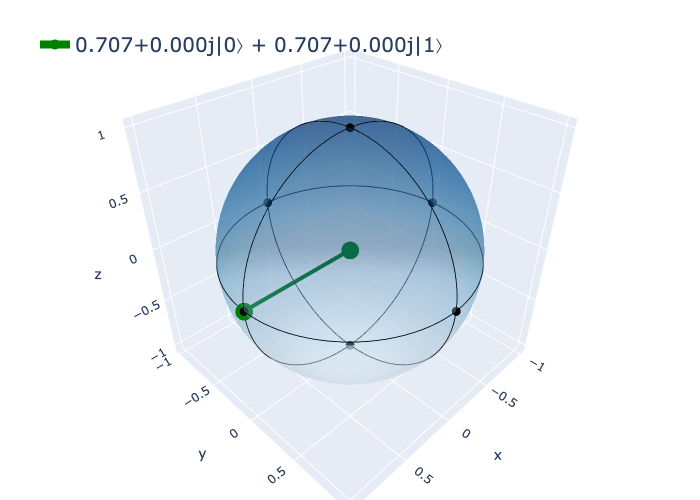

In [16]:
bloch(plus_state)

A superposition can be created not only on the real part of vector, but also on the complex part. Below shows a superposition state where $|+\rangle$ is flipped on the Y-axis. 

$$
\begin{bmatrix} 
0.5+0.5i \\ 0.5-0.5i \end{bmatrix} = (0.5+0.5i) |0\rangle + (0.5-0.5i) |1\rangle
$$


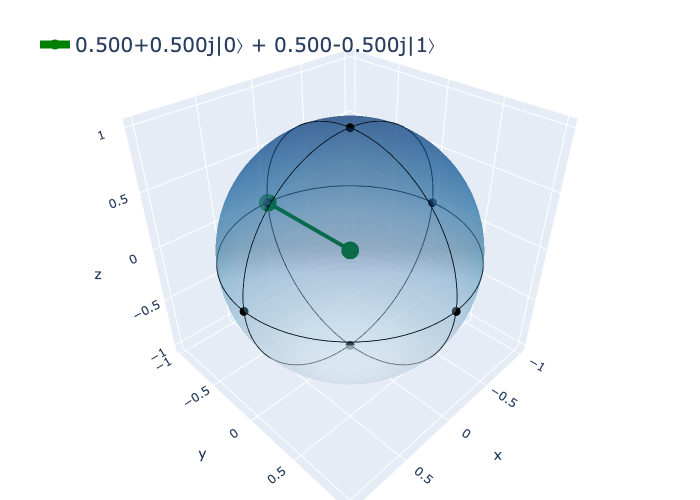

In [17]:
complex_superposition_state = np.array([0.5 + 0.5j, 
                                        0.5 - 0.5j], dtype=complex)
bloch(complex_superposition_state)

We can verify this complex superposition is a valid state by checking that $|\frac{1}{2} + 0.5j|^2 + |\frac{1}{2} - 0.5j|^2 = 1$.


In [18]:
complex_superposition_abs_sq_sum = np.sum(np.abs(complex_superposition_state) ** 2)
complex_superposition_abs_sq_sum

1.0000000000000002

In [19]:
np.allclose(complex_superposition_abs_sq_sum, 1)

True

## Measurement

[Measurement](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics) is an essential step to extract information from a quantum system. It [collapses the qubit to a classical state](https://en.wikipedia.org/wiki/Wave_function_collapse). We have mentioned that the statevector describes a probability distribution. To turn the quantum state into a probability distribution we have to take the absolute value of the statevector and square it.

In [20]:
def probs(s):
    """ Convert quantum statevector to probability distribution. """
    return np.abs(s) ** 2

Recall the **Bra** and **Ket** notation. In quantum mechanics Bra-Ket is used extensively to simplify notation for measurement. To get the probability for a given state, we take the inner product of the state with a basis state, which is most often $|0\rangle$ or $|1\rangle$. For a single qubit state $\psi$, the probability of measuring a state $0$ or $1$ is given by:

$$
P(0) = \left | \langle 0 | | \psi \rangle \right|^2 =  \left| \langle 0 | \psi \rangle \right|^2
$$

$$
P(1) = \left | \langle 1 | | \psi \rangle \right|^2 = \left| \langle 1 | \psi \rangle \right|^2
$$

Here the **Bra** determines the state we are measuring against and the **Ket** is the state we are measuring. "$ | | $" in the middle is simplified to "$|$". In contrast, the same symbol "$|$" around the Bra-Ket is used to denote the absolute value operation.

For the zero state $|0\rangle$, there is a 100% probability of measuring a 0. 

$$ 
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
\langle 0 | = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
$$

$$
P(0) = \left| \langle 0 | 0 \rangle \right|^2 = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 1
$$
$$
P(1) = \left| \langle 1 | 0 \rangle \right|^2 = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 0
$$

In [21]:
zero_ket = np.array([[1, 0]], dtype=complex).T
zero_bra = np.array([[1, 0]], dtype=complex)
one_ket = np.array([[0, 1]], dtype=complex).T
one_bra = np.array([[0, 1]], dtype=complex)

In [22]:
# Chance of getting a 0 from the zero_state is 100% (1)
np.abs(zero_bra @ zero_ket) ** 2

array([[1.]])

In [23]:
# Chance of getting a 1 from the zero state is 0% (0)
np.abs(one_bra @ zero_ket) ** 2

array([[0.]])

In [24]:
# Get both probabilities by taking the absolute value of the statevector and squaring it
np.abs(zero_ket) ** 2

array([[1.],
       [0.]])

For the one state ($|1\rangle$), there is a 100% probability of measuring a 1.

$$
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
\langle 1 | = \begin{bmatrix} 0 & 1 \end{bmatrix}, \quad
$$

$$
P(0) = \left| \langle 0 | 1 \rangle \right|^2 = 0, \quad
P(1) = \left| \langle 1 | 1 \rangle \right|^2 = 1
$$

In [25]:
# Chance of getting a 0 from the one state is 0% (0)
np.abs(zero_bra @ one_ket) ** 2

array([[0.]])

In [26]:
# Chance of getting a 1 from the one state is 100% (1)
np.abs(one_bra @ one_ket) ** 2

array([[1.]])

In [27]:
# 100% chance of 1
np.abs(one_ket) ** 2

array([[0.],
       [1.]])

For the superposition state, the probability of measuring a 0 and 1 are equal. Like a fair coin flip. In bra-ket notation, this state is often written as $|+\rangle$.

$$
|+\rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}, \quad
\langle + | = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{bmatrix}, \quad
$$

$$
P(0) = \left| \langle 0 | + \rangle \right|^2 = \frac{1}{2}, \quad
P(1) = \left| \langle 1 | + \rangle \right|^2 = \frac{1}{2}
$$

In [28]:
plus_ket = np.array([[1 / np.sqrt(2), 
                      1 / np.sqrt(2)]], dtype=complex).T

In [29]:
# Chance of getting a 0 from the plus state is 50% (0.5)
np.abs(zero_bra @ plus_ket) ** 2

array([[0.5]])

In [30]:
# Chance of getting a 1 from the plus state is 50% (0.5)
np.abs(one_bra @ plus_ket) ** 2

array([[0.5]])

In [31]:
# 50% chance of 0 and 50% chance of 1
np.abs(plus_ket) ** 2

array([[0.5],
       [0.5]])

So far so good. However, for the complex superposition state below, we also get an equal probability of measuring a $0$ and $1$. So how is this state different from the $|+\rangle$ state? The same probabilities are obtained, because our measurement is in what is called the "Z basis". From the perspective of the Z-axis, the two superposition states are identical. Measurements in quantum mechanics can be made in different bases, like $X$, $Y$ and $Z$ axes. What it implies is that we flip the state along that axis before taking the absolute value squared. If we would measure the complex superposition state in the $Y$ basis, the probabilities would be different from the $|+\rangle$ state. Flipping around all axes is discussed in the next notebook which covers quantum logic gates in detail.

In quantum computing we will often simplify and focus on measuring in the $Z$ basis. 

For an intuitive explanation of how quantum measurement comes about in nature, check out [this video](https://www.youtube.com/watch?v=aJ1wB9Gwyrc).

$$
|\psi\rangle = \begin{bmatrix} 0.5 + 0.5j \\ 0.5 - 0.5j \end{bmatrix}, \quad
\langle \psi | = \begin{bmatrix} 0.5 + 0.5j & 0.5 - 0.5j \end{bmatrix}
$$

$$
P(0) = \left| \langle 0 | \psi \rangle \right|^2 = \frac{1}{2}, \quad
P(1) = \left| \langle 1 | \psi \rangle \right|^2 = \frac{1}{2}
$$

In [32]:
complex_superposition_state = np.array([[0.5 + 0.5j, 
                                         0.5 - 0.5j]], dtype=complex).T

In [33]:
# Chance of getting a 0 from the complex superposition state is 50% (0.5)
np.abs(zero_bra @ complex_superposition_state) ** 2

array([[0.5]])

In [34]:
# Chance of getting a 1 from the complex superposition state is 50% (0.5)
np.abs(one_bra @ complex_superposition_state) ** 2

array([[0.5]])

In [35]:
# 50% chance of 0 and 50% chance of 1 (in the Z-basis)
probs(complex_superposition_state)

array([[0.5],
       [0.5]])

In [36]:
np.allclose(probs([0.5 + 0.5j, 0.5 - 0.5j]), probs([1, 1] / np.sqrt(2)))

True

Lastly, we need to sample for this probability measurement to obtain information from a quantum state in the form of classical bits. Most often we will sample many times and visualize the results in a [histogram](https://en.wikipedia.org/wiki/Histogram) to see what the most likely outcome is. In quantum computing, samples obtained from a quantum algorithm are called [shots](https://quantumcomputing.stackexchange.com/questions/9823/what-is-meant-with-shot-in-quantum-computation).

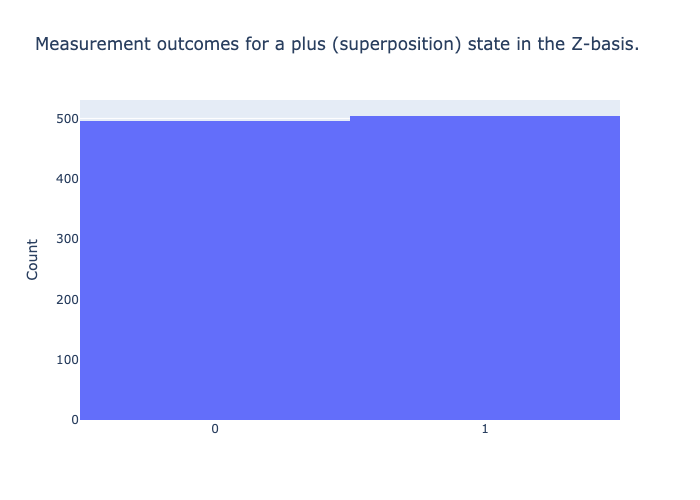

In [37]:
def measure_state(s):
    # Absolute value squared gives us the probability distribution from the statevector
    p = np.abs(s) ** 2
    # Sample from probability distribution to get classical bits
    return np.random.choice([0, 1], p=p)

# Pick 0 or 1 based on the 50/50 probabilities
samples = [measure_state(plus_state) for _ in range(1000)]

fig = go.Figure()
fig.add_trace(go.Histogram(x=samples))
fig.update_layout(title="Measurement outcomes for a plus (superposition) state in the Z-basis.", xaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["0", "1"]), yaxis=dict(title="Count"))
fig.show()

As expected, the samples are roughly 50/50 distributed. 

Thus far we have focused on the basic quantum states and the simple $X$ gate, but there are many more gates for single qubits and multiple qubits that we can leverage in quantum algorithms. Quantum logic gates are the core building blocks of any quantum algorithm. In the next notebook we will explain what a quantum logic gate in detail and the common groups of gates. This will allow us to manipulate qubits into any state we want. 

# BONUS: Qudits

Most quantum computers are focused on qubits, but quantum computing does not have to be limited to a superposition of only $|0\rangle$ and $|1\rangle$. The entire theory can be generalized by introducing additional basis states, which are called [qudits](https://en.wikipedia.org/wiki/Qubit#Qudits_and_qutrits). Some kinds of [quantum computers can work with these generalized states](https://www.nature.com/articles/s41534-024-00892-z) and in nature we also see phenomena that require more sophisticated representations compared to the qubit. In this course we will focus on qubits, but it is good to be aware that the theory behind it can be generalized. It is not unthinkable that working with more basis states on quantum computers could get more popular in the future.

An example of a quantum bit with 3 basis states is called a [qutrit](https://en.wikipedia.org/wiki/Qutrit) and is represented by a vector of 3 complex numbers.

$$
|\Psi\rangle = \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = a|0\rangle + b|1\rangle + c|2\rangle
$$

Computing with qutrits can be more complicated compared to qubits, but a qutrit can represent more information in a single vector.

In [38]:
zero_qutrit = np.array([1, 0, 0], dtype=complex)
zero_qutrit

array([1.+0.j, 0.+0.j, 0.+0.j])

Quantum logic gates for single qutrits are $3 \times 3$ matrices. A Qutrit $X$ gate flips the state of the qutrit from $|0\rangle$ to $|1\rangle$, from $|1\rangle$ to $|2\rangle$ and from $|2\rangle$ back to $|0\rangle$.

$$
X = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$



In [39]:
qutrit_X = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex)
# |1>
qutrit_X @ zero_qutrit

array([0.+0.j, 1.+0.j, 0.+0.j])

$$
X |0\rangle = |1\rangle
$$
$$
X(X |0\rangle) = X |1\rangle = |2\rangle
$$
$$
X(X(X |0\rangle)) = X(X |1\rangle) = X |2\rangle = |0\rangle
$$


In [40]:
# |2>
qutrit_X @ qutrit_X @ zero_qutrit

array([0.+0.j, 0.+0.j, 1.+0.j])

In [41]:
# |0>
qutrit_X @ qutrit_X @ qutrit_X @ zero_qutrit

array([1.+0.j, 0.+0.j, 0.+0.j])

A superposition state $|+\rangle$ of a qutrit looks like this. Instead of $\frac{1}{\sqrt{2}}$, we now have to distribute the probability amplitudes over $3$ states and make sure that $|a|^2 + |b|^2 + |c|^2 = 1$.

$$| + \rangle = 
\begin{bmatrix} \frac{1}{\sqrt{3}} \\ \frac{1}{\sqrt{3}} \\ \frac{1}{\sqrt{3}} \end{bmatrix} = \begin{bmatrix} 0.577 \\ 0.577 \\ 0.577 \end{bmatrix}  = \frac{1}{\sqrt{3}} |0\rangle + \frac{1}{\sqrt{3}} |1\rangle + \frac{1}{\sqrt{3}} |2\rangle
$$



In [42]:
superposition_qutrit = np.array([1 / np.sqrt(3), 1 / np.sqrt(3), 1 / np.sqrt(3)], dtype=complex)
superposition_qutrit

array([0.57735027+0.j, 0.57735027+0.j, 0.57735027+0.j])

Similar to qubits, applying the $X$ gate on this $|+\rangle$ state will not change the state.

In [43]:
np.allclose(qutrit_X @ superposition_qutrit, superposition_qutrit)

True

The theory of this can be applied to as many basis states as you want.